In [12]:
from langchain_huggingface import HuggingFaceEmbeddings
import oracledb

In [6]:
! pip install sentence-transformers

In [9]:
#from sentence_transformers import SentenceTransformer

In [11]:
#embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2") # dim 384/768

text = ["oracle 23 ai support vector search",
        "huggingface embedding can be store in vector datatype"]

In [ ]:
vectors = embeddings.encode(text).tolist() 
## 
## Connect to oracle
conn = oracledb.connect(user="",password="",dsn="")
cur = conn.cursor()

## insert text + embedding vector
sql_query = "insert into doc_vector(doc_text,embedding) values(:1,:2)"

for t,v in zip(text,vectors):
    cur.execute(sql_query,[t,v]) # pass vector as list

conn.commit()

user_query="How to store embeddings in oracle?"
query_vector = embeddings.encode([user_query].tolist()[0])

cur.execute("""
select * from doc_vector ORDER BY VECTOR_DISTANCE(embedding,:1,COSINE) FETCH FRIST 3 ROWS ONLY""",[query_vector])

print(cur.fetchall())

In [13]:
from langchain_ollama import OllamaEmbeddings
embed = OllamaEmbeddings(model="nomic-embed-text:latest")
vec = embed.embed_query("what is langchain?")

In [14]:
len(vec)

768

In [16]:
import oracledb
conn = oracledb.connect(user="student",password="apelix",dsn="localhost:1521/FREEPDB1")
sth = conn.cursor()
sth.execute("create table t2(docs CLOB,myvector VECTOR(768,*))")

In [18]:
text = ["oracle 23 ai support vector search",
        "huggingface embedding can be store in vector datatype"]

In [22]:
vectors=[]
for var in text:
    r = embed.embed_query(var)
    vectors.append(r)

In [23]:
len(vectors)

2

In [29]:
zip(text,vectors)

In [33]:
## insert text + embedding vector
sql_query = "insert into t2(docs,myvector) values(:1,TO_VECTOR(:2))"

#sth.execute(sql_query,("Langchain is a framework",vectors))

In [34]:
### Now oracle db stores the vector
query_vector =  embed.embed_query("Explain about vector search")

In [ ]:
sth.execute("""
select docs from t2 order by vector_distance(embedding,TO_VECTOR(:1)) fetch first 3 rows only""",(query_vector,))

In [ ]:
list(sth)
<or>
sth.fetchall()

In [35]:
zip(text,vectors)

In [37]:
# for var in zip(text,vectors):
#    print(var)

('oracle 23 ai support vector search', [-0.024201235, 0.062641926, -0.12168575, -0.008429363, 0.039939083, -0.05845447, 0.00629193, 0.012562361, -0.0073057525, 0.033393055, 0.027847882, 0.019963985, 0.06738748, -0.021824984, -0.041611113, -0.0036716654, -0.015775898, -0.019332226, -0.022625653, -0.02133968, 0.05849356, -0.04253779, -0.017455626, 0.046542525, 0.14594874, 0.013684451, -0.00894116, 0.03167967, 0.028557744, -0.008112037, 0.025537815, 0.04070315, 0.04141112, -0.04247322, -0.025620105, -0.03222546, 0.032661628, 0.03727119, -0.002028353, 0.043472793, 0.014162501, -0.020451825, 0.01972923, -0.043564737, 0.038267363, -0.024016282, 0.043037403, -0.033625275, 0.048977956, -0.069499604, 0.0062559284, 0.021123629, -0.012033612, -0.040331177, 0.007867527, 0.010352709, -0.020064613, -0.017515209, -0.023368847, -0.039211884, 0.052504152, 0.032206148, -0.02927208, 0.018263195, 0.0805656, -0.04299227, 0.0017371526, 0.014806376, -0.037986644, 0.03200165, 0.018035721, 0.0012139606, 0.0256

In [38]:
import os
os.getcwd()

'C:\\Users\\karth'

In [39]:
! streamlit run C:\\Users\\karth\\D2\\p3.py

^C


In [41]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [42]:
! streamlit run rag_chathistory_stream.py

^C


In [43]:
! pip show langgraph

Name: langgraph
Version: 0.6.2
Summary: Building stateful, multi-actor applications with LLMs
Home-page: 
Author: 
Author-email: 
License-Expression: MIT
Location: C:\ProgramData\anaconda3\Lib\site-packages
Requires: langchain-core, langgraph-checkpoint, langgraph-prebuilt, langgraph-sdk, pydantic, xxhash
Required-by: 


In [ ]:
! pip install langgraph

In [44]:
from langgraph.graph import StateGraph

In [46]:
from langchain_groq import ChatGroq

import os
from dotenv import load_dotenv
load_dotenv()
llm_obj = ChatGroq(model="llama-3.1-8b-instant",api_key=os.getenv("GROQ_API_KEY"))

In [48]:
# define state schema
class state(dict):
    messages: list

# define two nodes
def agent1_ask_question(a1: state):
    '''Ask the user for topic'''
    topic = input('Enter a topic name:')
    a1["messages"] = [f"summarize {topic} in one short paragraph"]
    return a1


def agent2_summarize(a1: state):
    '''summarize the given topic'''
    prompt = a1["messages"][0]
    response = llm_obj.invoke(prompt)
    print("AI Summary:",response)
    return a1


# Build LangGraph
graph = StateGraph(state)
graph.add_node("Ask_Topic",agent1_ask_question)
graph.add_node("Summarize",agent2_summarize)

# connect nodes
graph.set_entry_point("Ask_Topic")
graph.add_edge("Ask_Topic","Summarize")
graph.set_finish_point("Summarize")

# compile and run
app = graph.compile()
app.invoke({})

    

Enter a topic name: Langchain


AI Summary: content='LangChain is an open-source AI framework that enables users to build, train, and deploy large language models. It provides a set of tools and APIs to simplify the process of creating custom language models that can perform tasks such as question-answering, text generation, and conversation. LangChain is designed to be highly customizable and allows users to integrate with various external services, making it a popular choice for developers and researchers working on AI projects.' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 90, 'prompt_tokens': 44, 'total_tokens': 134, 'completion_time': 0.151237322, 'prompt_time': 0.002625517, 'queue_time': 0.05083011, 'total_time': 0.153862839}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None} id='run--ff821a71-1f45-4487-b638-a49ac593263a-0' usage_metadata={'input_tokens': 44, 'output_tokens': 90, 't

{'messages': ['summarize Langchain in one short paragraph']}

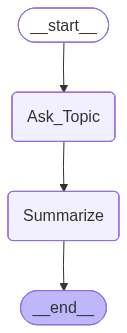

In [49]:
from IPython.display import Image,display

display(Image(app.get_graph().draw_mermaid_png()))

In [50]:
# define state schema
class state(dict):
    messages: list

# define two nodes
def agent1_ask_question(a1: state):
    '''Ask the user for topic'''
    topic = input('Enter a topic name:')
    a1["messages"] = [f"summarize {topic} in one short paragraph"]
    print("--->",a1)
    return a1


def agent2_summarize(a1: state):
    '''summarize the given topic'''
    prompt = a1["messages"][0]
    response = llm_obj.invoke(prompt)
    print("AI Summary:",response)
    return a1


# Build LangGraph
graph = StateGraph(state)
graph.add_node("Ask_Topic",agent1_ask_question)
graph.add_node("Summarize",agent2_summarize)

# connect nodes
graph.set_entry_point("Ask_Topic")
graph.add_edge("Ask_Topic","Summarize")
graph.set_finish_point("Summarize")

# compile and run
app = graph.compile()
app.invoke({})

    

Enter a topic name: langchain


---> {'messages': ['summarize langchain in one short paragraph']}
AI Summary: content='LangChain is an open-source framework for building multi-model AI applications. It allows developers to connect and orchestrate various large language models (LLMs) and other AI tools to create more powerful and specialized AI systems. LangChain enables users to combine the strengths of different models, leveraging their individual capabilities to achieve more complex tasks, such as question-answering, text generation, and decision-making.' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 81, 'prompt_tokens': 44, 'total_tokens': 125, 'completion_time': 0.175811292, 'prompt_time': 0.002875347, 'queue_time': 0.050808513, 'total_time': 0.178686639}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None} id='run--647aa7da-77bf-4452-846b-943fa83da13e-0' usage_metadata={'input_tokens': 

{'messages': ['summarize langchain in one short paragraph']}

In [57]:
from typing import TypedDict,List
from langgraph.graph import StateGraph,END

In [75]:
class GraphState(TypedDict):
    question: str
    documents: List[str]
    answer: str
    retries: int

In [76]:
def f1(a1: str):
    if 'langgraph' in a1.lower():
        return ["LangGraph is a graph-base agent framework built on langchain"]
    return []

def f2(a1: str):
    '''mock llm'''
    return f"Answer:{a1}"

def retrieve(state: GraphState):
    docs = f1(state['question'])
    return {"documents":docs}

def generate(state: GraphState):
    context = " ".join(state["documents"])
    answer = f2(f"context:{context}")
    return {"answer":answer}

def rewrite_question(state: GraphState):
    new_q = state["question"] + "langgraph "
    return { "question": new_q, "retries": state["retries"] + 1 }

def AGENT4_decision(state: GraphState):
    #if(len(state["documents"]) == 0 and state["retries"] < 2:
    if len(state["documents"]) == 0:
        return "retry"
    return "generate"

    

In [77]:
# Graph
graph = StateGraph(GraphState)
graph.add_node("retrieve",retrieve)
graph.add_node("rewrite",rewrite_question)
graph.add_node("generate",generate)

graph.set_entry_point("retrieve")
graph.add_conditional_edges(
    "retrieve",
    AGENT4_decision,
    {
        "retry":"rewrite",
        "generate":"generate",
    }
)
graph.add_edge("rewrite","retrieve")
graph.add_edge("generate",END)

app = graph.compile()

if __name__ == '__main__':
    initial_state: GraphState = {
        "question": "what is langgraph",
        "documents": [],
        "answer": "",
        "retries": 0
    }
    result = app.invoke(initial_state)
    print(result)

{'question': 'what is langgraph', 'documents': ['LangGraph is a graph-base agent framework built on langchain'], 'answer': 'Answer:context:LangGraph is a graph-base agent framework built on langchain', 'retries': 0}


In [78]:
if __name__ == '__main__':
    initial_state: GraphState = {
        "question": "what is langgraph",
        "documents": [],
        "answer": "",
        "retries": 0
    }
    result = app.invoke(initial_state)
    print(result)

{'question': 'what is langgraph', 'documents': ['LangGraph is a graph-base agent framework built on langchain'], 'answer': 'Answer:context:LangGraph is a graph-base agent framework built on langchain', 'retries': 0}


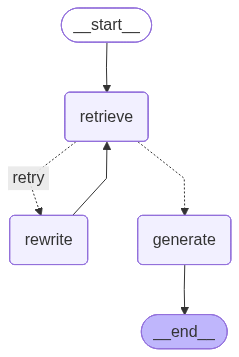

In [79]:
from IPython.display import Image,display

display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
Case 1 . No documents found 
retrieve
|
AGENT4_decision ->returns "retry"
|
rewrite
    |
    retrieve(again)

---------------------------
Case 2: Documents found

retrieve
    |
AGENT4_decision ->return "generate"
    |
    generate
    |
    END

In [ ]:
Fine-Tuning
--------------
Pre-trained model 
=================// public data 

 PersonA -->[500 books - about list of animals]
             ==================================//
   |
   |
 RAG
 - data_set ---------------------- PersonA(LLM)
    - product features                             <--- EndUser(Customer): Q: about product
                                                                                   .... token-pretrained
                                           |----------------------------------pre-trained answer 

During fine-tuning
model weights changed  ->model's behavior changed ->biased our data

In [ ]:
#####################################   End of DAY5 ######################